## Task 25-> Logistic Regression from scratch
Submitted by: Awais Anwer

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def compute_loss(y_true, y_pred):
    epsilon = 1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
    return -np.mean(y1 + y2)

In [ ]:
def feed_forward(X, weights, bias):
    z = np.dot(X, weights) + bias
    return sigmoid(z)

In [ ]:
def fit(X, y, learning_rate=0.001, n_iters=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for _ in range(n_iters):
        A = feed_forward(X, weights, bias)
        losses.append(compute_loss(y, A))
        dz = A - y
        dw = (1 / n_samples) * np.dot(X.T, dz)
        db = (1 / n_samples) * np.sum(dz)
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, losses

In [ ]:
def predict(X, weights, bias, threshold=0.5):
    y_hat = np.dot(X, weights) + bias
    y_predicted = sigmoid(y_hat)
    y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
    return np.array(y_predicted_cls)

In [ ]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# model training
learning_rate = 0.0001
n_iters = 1000
weights, bias, losses = fit(X_train, y_train, learning_rate, n_iters)

Test accuracy: 0.930


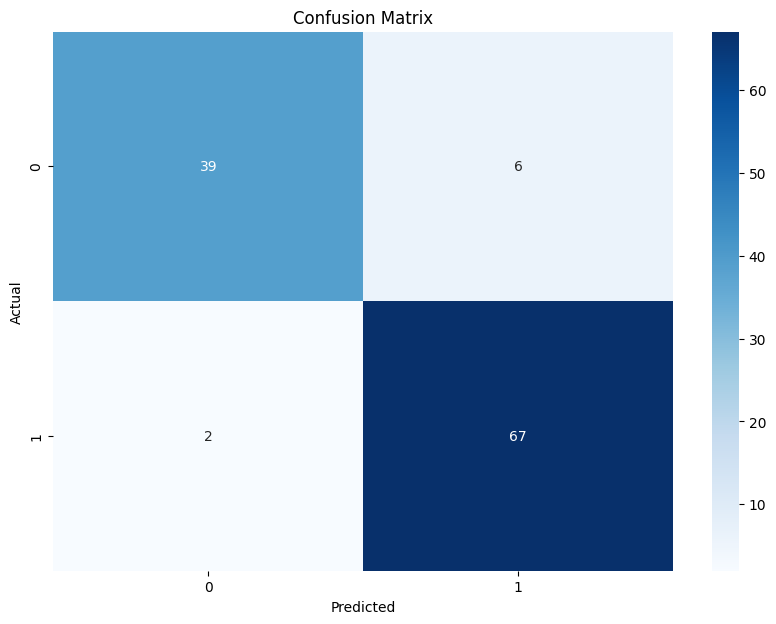

In [23]:
# Make predictions
predictions = predict(X_test, weights, bias)

accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print(f"Test accuracy: {accuracy:.3f}")

# confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()